## 🏠 Part I. King County House Prices — Data Cleaning/Feature Selection

This notebook demonstrates a workflow to build a regression model to predict house prices based on their characteristics

- Data cleaning
- Feature engineering
- Model training and evaluation

In [1]:
# Basic package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Train/Test split
from sklearn.model_selection import train_test_split

# Normalization/Standardization
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# LogisticRegression
from sklearn.linear_model import LogisticRegression

# Classfier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC

# Ensemble methods
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 1️⃣ Load and inspect the dataset

In [2]:
df=pd.read_csv(r"C:\Users\SAMSUNG\Desktop\Project2\king_ country_ houses_aa.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
house=df.copy()
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
house.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [5]:
#none
#['id', 'date']

#numerical variables
num=house[['id', 'date', 'yr_built', 'yr_renovated', 'price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15', 'lat', 'long', 'zipcode', 'bedrooms', 'bathrooms','floors']]

#categorical variables
cat=house[[ 'waterfront', 'view', 'condition', 'grade' ]]

#target variable
#['price']

In [7]:
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   yr_built       21613 non-null  int64  
 3   yr_renovated   21613 non-null  int64  
 4   price          21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   sqft_above     21613 non-null  int64  
 8   sqft_basement  21613 non-null  int64  
 9   sqft_living15  21613 non-null  int64  
 10  sqft_lot15     21613 non-null  int64  
 11  lat            21613 non-null  float64
 12  long           21613 non-null  float64
 13  zipcode        21613 non-null  int64  
 14  bedrooms       21613 non-null  int64  
 15  bathrooms      21613 non-null  float64
 16  floors         21613 non-null  float64
dtypes: float64(5), int64(11), object(1)
memory usage: 

In [8]:
num.describe()

,id,yr_built,yr_renovated,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,lat,long,zipcode,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,2.161300e+04,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,1971.005136,84.402258,5.400881e+05,2079.899736,1.510697e+04,1788.390691,291.509045,1986.552492,12768.455652,47.560053,-122.213896,98077.939805,3.370842,2.114757,1.494309
std,2.876566e+09,29.373411,401.679240,3.671272e+05,918.440897,4.142051e+04,828.090978,442.575043,685.391304,27304.179631,0.138564,0.140828,53.505026,0.930062,0.770163,0.539989
min,1.000102e+06,1900.000000,0.000000,7.500000e+04,290.000000,5.200000e+02,290.000000,0.000000,399.000000,651.000000,47.155900,-122.519000,98001.000000,0.000000,0.000000,1.000000
25%,2.123049e+09,1951.000000,0.000000,3.219500e+05,1427.000000,5.040000e+03,1190.000000,0.000000,1490.000000,5100.000000,47.471000,-122.328000,98033.000000,3.000000,1.750000,1.000000
50%,3.904930e+09,1975.000000,0.000000,4.500000e+05,1910.000000,7.618000e+03,1560.000000,0.000000,1840.000000,7620.000000,47.571800,-122.230000,98065.000000,3.000000,2.250000,1.500000
75%,7.308900e+09,1997.000000,0.000000,6.450000e+05,2550.000000,1.068800e+04,2210.000000,560.000000,2360.000000,10083.000000,47.678000,-122.125000,98118.000000,4.000000,2.500000,2.000000
max,9.900000e+09,2015.000000,2015.000000,7.700000e+06,13540.000000,1.651359e+06,9410.000000,4820.000000,6210.000000,871200.000000,47.777600,-121.315000,98199.000000,33.000000,8.000000,3.500000


In [9]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   waterfront  21613 non-null  int64
 1   view        21613 non-null  int64
 2   condition   21613 non-null  int64
 3   grade       21613 non-null  int64
dtypes: int64(4)
memory usage: 675.5 KB


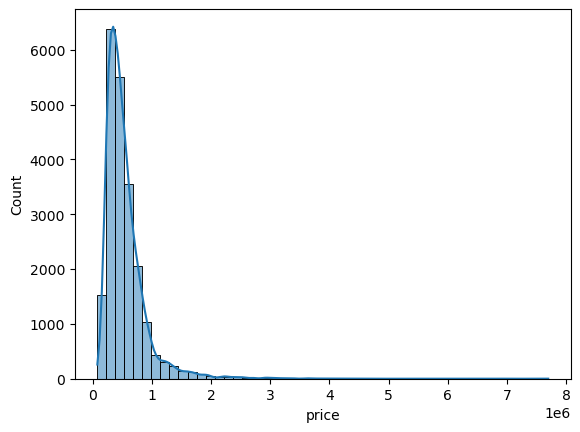

In [ ]:
#univariate analysis
sns.histplot(house['price'], bins=50, kde=True)
plt.show()

In [ ]:
#descriptive statistics
house['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [9]:
house['price'].skew()

np.float64(4.024069144684712)

In [10]:
house['price'].kurt()

np.float64(34.58554043194243)

In [11]:
#Outlier?
Q1 = house['price'].quantile(0.25)
Q3 = house['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-162625.0 1129575.0


## 2️⃣ Data cleaning & exploring

In [12]:
#missing values = 0
house.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
#count duplicate rows = 0
house.duplicated().sum()

np.int64(0)

In [14]:
#find 177 duplicates in 'id' columns
house.duplicated(subset=['id']).value_counts()

False    21436
True       177
Name: count, dtype: int64

In [15]:
house['bedrooms'].value_counts().sort_index()
#13 house where the number of bedroom is 0

bedrooms
0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [16]:
house['bathrooms'].value_counts().sort_index()
#10 house where the number of bedroom is 0

bathrooms
0.00      10
0.50       4
0.75      72
1.00    3852
1.25       9
1.50    1446
1.75    3048
2.00    1930
2.25    2047
2.50    5380
2.75    1185
3.00     753
3.25     589
3.50     731
3.75     155
4.00     136
4.25      79
4.50     100
4.75      23
5.00      21
5.25      13
5.50      10
5.75       4
6.00       6
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
8.00       2
Name: count, dtype: int64

In [17]:
house[((house["bedrooms"] <= 0) | (house["bathrooms"] <= 0))]
#16 houses where either bathroom or bedroom is 0

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
1149,3421079032,20150217T000000,75000.0,1,0.00,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
3119,3918400017,20150205T000000,380000.0,0,0.00,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,1453602309,20140805T000000,288000.0,0,1.50,1430,1650,3.0,0,0,...,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
5832,5702500050,20141104T000000,280000.0,1,0.00,600,24501,1.0,0,0,...,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
6994,2954400190,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,2569500210,20141117T000000,339950.0,0,2.50,2290,8319,2.0,0,0,...,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2310060040,20140925T000000,240000.0,0,2.50,1810,5669,2.0,0,0,...,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,3374500520,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050


In [28]:
house.shape

(21613, 21)

In [18]:
#data cleaning where the number of bedrooms and bathrooms is 0
house = house[~((house["bedrooms"] <= 0) | (house["bathrooms"] <= 0))]
house.shape

(21597, 21)

In [19]:
#changing dtype of date to datetime
house['date']=pd.to_datetime(house['date'])

In [20]:
#adding two new columns 'sale_year' and 'house_age'
house['sale_year']=house['date'].dt.year
house['house_age']=house['sale_year']-house['yr_built']

In [21]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,house_age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28


In [ ]:
#data cleaning where where sale_year < yr_built
house=house[~(house["sale_year"] < house["yr_built"])]

In [26]:
house.shape

(21585, 23)

In [27]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21585 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21585 non-null  int64         
 1   date           21585 non-null  datetime64[ns]
 2   price          21585 non-null  float64       
 3   bedrooms       21585 non-null  int64         
 4   bathrooms      21585 non-null  float64       
 5   sqft_living    21585 non-null  int64         
 6   sqft_lot       21585 non-null  int64         
 7   floors         21585 non-null  float64       
 8   waterfront     21585 non-null  int64         
 9   view           21585 non-null  int64         
 10  condition      21585 non-null  int64         
 11  grade          21585 non-null  int64         
 12  sqft_above     21585 non-null  int64         
 13  sqft_basement  21585 non-null  int64         
 14  yr_built       21585 non-null  int64         
 15  yr_renovated   21585 non

##### Correlation matrix

- The goal is to remove redundant features (multicollinearity)
- Correlation coefficients (like Pearson’s r) measure linear relationships between numerical variables
- Include numerical (continous or ordinal) variables / exclude categorical variables which gives misleading results 


In [30]:
#correlation matrix only for numerical (continuous or ordinal variables)
#excluding categorical variables [['waterfront', 'view', 'zipcode' ]]
house_corr=house.drop(['id', 'date', 'waterfront', 'view', 'zipcode'], axis=1)

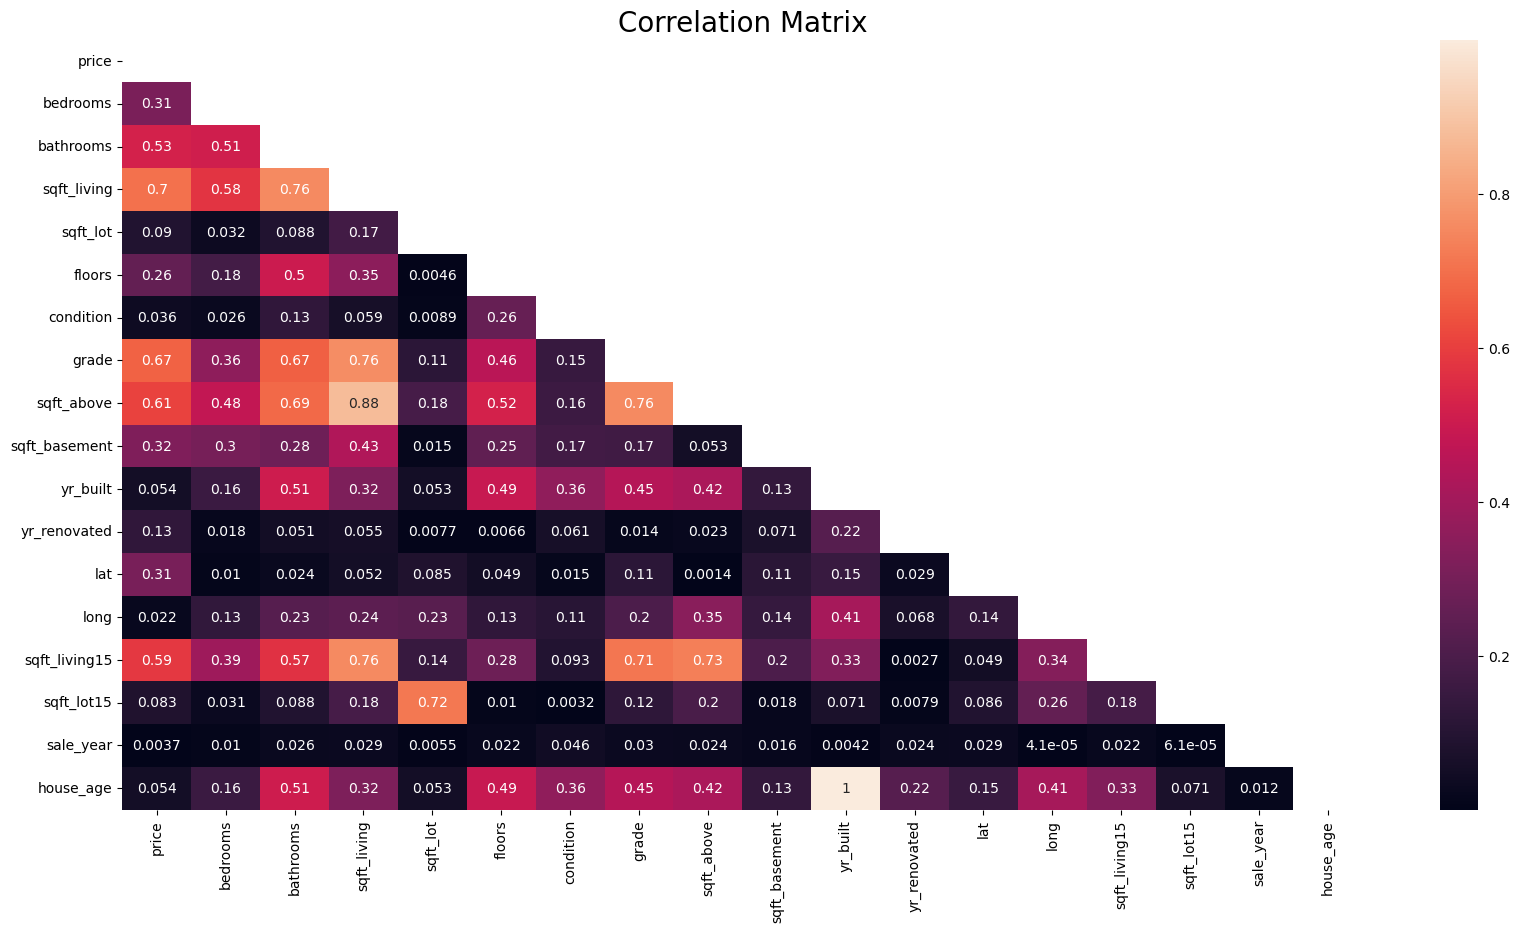

In [31]:
#heatmap
corr=np.abs(house_corr.corr())

mask=np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr, mask=mask, annot=corr )
plt.title("Correlation Matrix", fontsize = 20);
plt.show()

In [32]:
corr_with_price = house_corr.corr()['price'].sort_values(ascending=False)
print(corr_with_price)

price            1.000000
sqft_living      0.702162
grade            0.668228
sqft_above       0.605519
sqft_living15    0.585252
bathrooms        0.526045
sqft_basement    0.323795
bedrooms         0.308902
lat              0.306874
floors           0.257205
yr_renovated     0.126397
sqft_lot         0.089855
sqft_lot15       0.082813
yr_built         0.054189
condition        0.035960
long             0.021999
sale_year        0.003671
house_age       -0.054127
Name: price, dtype: float64


🧮Correlation matrix

For feature selection:

- Make sure to keep the features which shows a stronger correlation with target 'price' : sqft_living, grade, sqft_above, sqft_living15, bathrooms (correlation >0.5: moderate to very strong)

- Consider to remove one of each pair with correlation >0.8 or >0.9 :yr_built and house_age(1, make sense since the house_age was calculated based on yr_built) / sqrt_living and sqrt_above(0.88)

Text(0.5, 1.0, 'Price vs Living space(sqft_living)')

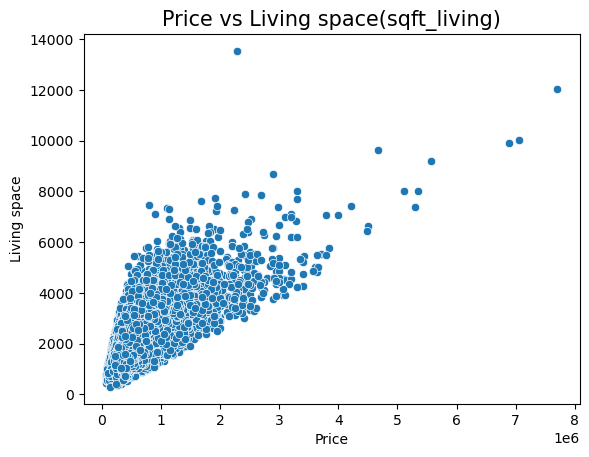

In [17]:
sns.scatterplot(x=house.price, y=house.sqft_living)
plt.xlabel("Price", fontsize=10)
plt.ylabel("Living space", fontsize=10)
plt.title("Price vs Living space(sqft_living)", fontsize=15)

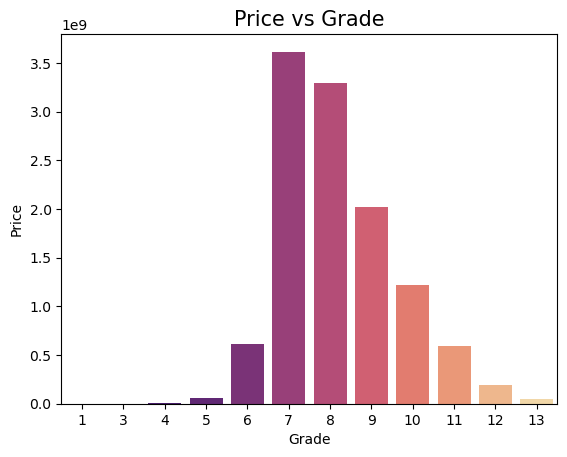

In [18]:
sns.barplot(x=house.grade, y=house.price, palette="magma", estimator=sum, ci=None)
plt.xlabel("Grade", fontsize=10)
plt.ylabel("Price", fontsize=10)
plt.title("Price vs Grade", fontsize=15)
plt.show()

## 3️⃣ Test the model with raw data

In [57]:
#drop the unnecessary colums like id, date for analysis
#yr_built/house_age are basically same, since house_age was calculated from yr_build and sale_year
X=house.drop(['id', 'date',  'price'], axis=1)
y=house['price']

In [58]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,house_age
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,63
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28


In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Define models
models = {
    "Linear Regression": LinearRegression(),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42)
}

# Train, predict, and evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    results.append({
        "Model": name,
        "Train_MSE": train_mse,
        "Test_MSE": test_mse,
        "Train_R2": train_r2,
        "Test_R2": test_r2
    })

# Results DataFrame
results_df = pd.DataFrame(results).sort_values(by="Test_R2", ascending=False)

print("✅ Model Comparison (Train vs Test):")
print(results_df)

✅ Model Comparison (Train vs Test):
               Model     Train_MSE      Test_MSE  Train_R2   Test_R2
6            XGBoost  2.982159e+09  1.350529e+10  0.978001  0.897639
3      Random Forest  2.323491e+09  1.550894e+10  0.982860  0.882453
5  Gradient Boosting  1.310867e+10  1.661128e+10  0.903300  0.874098
2      Decision Tree  9.108929e+06  2.984630e+10  0.999933  0.773785
0  Linear Regression  4.064180e+10  3.848296e+10  0.700195  0.708325
1      KNN Regressor  4.393729e+10  6.298556e+10  0.675885  0.522611
4           AdaBoost  1.032946e+11  1.049088e+11  0.238020  0.204861


## 4️⃣ Feature Selection

##### Feature Importance using Xgboost

- The goal is to identify feature tha actually improve prediction or maybe to remove irrelevant or weak features
- The XGBoost model (a tree-based ensemble) can tell how much each feature contributed to the model's predictive power
- The model has different types of feature importance metrics
- The type 'gain' is the most informative: average gain in accuracy or loss reduction brought by a feature when it is used in trees 

In [20]:
# Split data
X = house._get_numeric_data().drop(['id', 'price'],axis=1)
y = house.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = xgb.XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Feature importance

importance=model.feature_importances_
feature_importance=pd.DataFrame({'Feature' : X_train.columns, 'Importance' : importance}).sort_values(by='Importance', ascending=False)
feature_importance.head(10)


,Feature,Importance
8,grade,0.415983
5,waterfront,0.223101
2,sqft_living,0.107904
14,lat,0.058025
6,view,0.040213
15,long,0.033232
1,bathrooms,0.019306
11,yr_built,0.017672
16,sqft_living15,0.016446
13,zipcode,0.013776


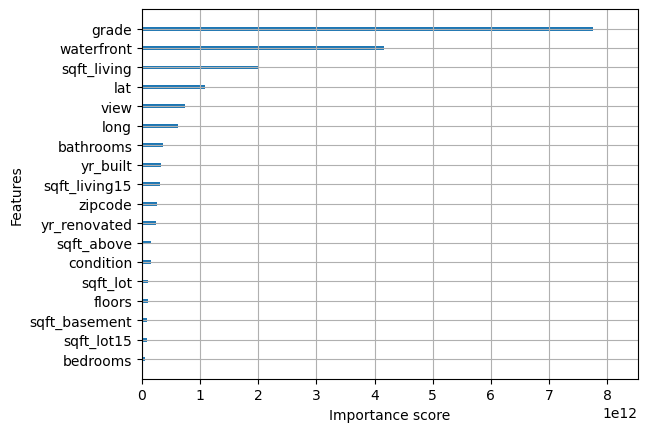

In [21]:
# Plot


ax = xgb.plot_importance(model, importance_type='gain')

# Remove the numeric annotations beside the bars
for child in ax.get_children():
    if isinstance(child, plt.Text):
        if child.get_position()[0] > 0:  # the score texts are to the right of the bars
            child.set_visible(False)
plt.title("Feature importance", fontsize = 20)
plt.show()

In [73]:
#Remove very low-importance features (bottom 10%)
threshold = feature_importance['Importance'].mean() * 0.1
selected_features90 = feature_importance[feature_importance['Importance'] > threshold]['Feature']

In [75]:
selected_features90

8             grade
5        waterfront
2       sqft_living
14              lat
15             long
6              view
19        house_age
13          zipcode
16    sqft_living15
1         bathrooms
9        sqft_above
11         yr_built
18        sale_year
12     yr_renovated
10    sqft_basement
7         condition
3          sqft_lot
4            floors
Name: Feature, dtype: object

In [76]:
#Remove very low-importance features (bottom 20%)
threshold = feature_importance['Importance'].mean() * 0.2
selected_features80 = feature_importance[feature_importance['Importance'] > threshold]['Feature']

In [77]:
selected_features80 

8             grade
5        waterfront
2       sqft_living
14              lat
15             long
6              view
19        house_age
13          zipcode
16    sqft_living15
1         bathrooms
Name: Feature, dtype: object

🧮Feature importance

- 'grade', 'waterfront', 'sqft_living' explain about 70 % of the total model importance, it means the model relies on three features to predict price
- 'grade' (construction/finish quality/house condition) is by far the strongest driver of price, aligns with real estate logic.
-  Having a 'waterfront' property can boost prce
- Larger living area increase price

- Location still matters: lat, long (slightly zipcode) 

- Time and Age effects like House age, yr_built, yr_renovated 

- Weaker structural features like bathrooms, bedroom, floors

- Feature redundancy 
  sqft_living/sqft_above/sqft_basement
  yr_built/yr_renovated/house_age
  sqft_lot/sqft_lot15
  sqft_living/sqft_living15


This model is heavily driven by quality (grade) and unique location features (waterfront, lat/long).
Size (sqft_living) remains a strong linear-type driver, as expected.
“Cosmetic” features like bedrooms, floors, condition don’t matter much once the main factors are accounted for.
Age-related and lot features contribute marginally.

In [64]:
house1=house.copy()

In [ ]:
#select the features dropping the columns below threshold (top90%) (two features: sqrt_lot15, bedrooms)
house1[selected_features90]

,grade,waterfront,sqft_living,lat,long,view,house_age,zipcode,sqft_living15,bathrooms,sqft_above,yr_built,sale_year,yr_renovated,sqft_basement,condition,sqft_lot,floors
0,7,0,1180,47.5112,-122.257,0,59,98178,1340,1.00,1180,1955,2014,0,0,3,5650,1.0
1,7,0,2570,47.7210,-122.319,0,63,98125,1690,2.25,2170,1951,2014,1991,400,3,7242,2.0
2,6,0,770,47.7379,-122.233,0,82,98028,2720,1.00,770,1933,2015,0,0,3,10000,1.0
3,7,0,1960,47.5208,-122.393,0,49,98136,1360,3.00,1050,1965,2014,0,910,5,5000,1.0
4,8,0,1680,47.6168,-122.045,0,28,98074,1800,2.00,1680,1987,2015,0,0,3,8080,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,8,0,1530,47.6993,-122.346,0,5,98103,1530,2.50,1530,2009,2014,0,0,3,1131,3.0
21609,8,0,2310,47.5107,-122.362,0,1,98146,1830,2.50,2310,2014,2015,0,0,3,5813,2.0
21610,7,0,1020,47.5944,-122.299,0,5,98144,1020,0.75,1020,2009,2014,0,0,3,1350,2.0
21611,8,0,1600,47.5345,-122.069,0,11,98027,1410,2.50,1600,2004,2015,0,0,3,2388,2.0


In [ ]:
X=house1[selected_features90]
y=house1['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Define models
models = {
    "Linear Regression": LinearRegression(),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42)
}

# Train, predict, and evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    results.append({
        "Model": name,
        "Train_MSE": train_mse,
        "Test_MSE": test_mse,
        "Train_R2": train_r2,
        "Test_R2": test_r2
    })

# Results DataFrame
results_df = pd.DataFrame(results).sort_values(by="Test_R2", ascending=False)

print("✅ Model Comparison (Train vs Test):")
print(results_df)

✅ Model Comparison (Train vs Test):
               Model     Train_MSE      Test_MSE  Train_R2   Test_R2
6            XGBoost  3.090277e+09  1.477715e+10  0.977204  0.887999
3      Random Forest  2.330628e+09  1.557872e+10  0.982807  0.881924
5  Gradient Boosting  1.304919e+10  1.646161e+10  0.903739  0.875232
2      Decision Tree  9.115443e+06  3.066811e+10  0.999933  0.767556
0  Linear Regression  4.144075e+10  3.872246e+10  0.694301  0.706509
1      KNN Regressor  3.979246e+10  5.729800e+10  0.706460  0.565719
4           AdaBoost  9.246075e+10  9.435845e+10  0.317939  0.284826


🧮 Selecting features based on the feature importance score (top 90%) did not imporve the r2 score. 

In [80]:
#select the features dropping the columns below threshold (top 80%) (two features: sqrt_lot15, bedrooms)
house1[selected_features90]

,grade,waterfront,sqft_living,lat,long,view,house_age,zipcode,sqft_living15,bathrooms,sqft_above,yr_built,sale_year,yr_renovated,sqft_basement,condition,sqft_lot,floors
0,7,0,1180,47.5112,-122.257,0,59,98178,1340,1.00,1180,1955,2014,0,0,3,5650,1.0
1,7,0,2570,47.7210,-122.319,0,63,98125,1690,2.25,2170,1951,2014,1991,400,3,7242,2.0
2,6,0,770,47.7379,-122.233,0,82,98028,2720,1.00,770,1933,2015,0,0,3,10000,1.0
3,7,0,1960,47.5208,-122.393,0,49,98136,1360,3.00,1050,1965,2014,0,910,5,5000,1.0
4,8,0,1680,47.6168,-122.045,0,28,98074,1800,2.00,1680,1987,2015,0,0,3,8080,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,8,0,1530,47.6993,-122.346,0,5,98103,1530,2.50,1530,2009,2014,0,0,3,1131,3.0
21609,8,0,2310,47.5107,-122.362,0,1,98146,1830,2.50,2310,2014,2015,0,0,3,5813,2.0
21610,7,0,1020,47.5944,-122.299,0,5,98144,1020,0.75,1020,2009,2014,0,0,3,1350,2.0
21611,8,0,1600,47.5345,-122.069,0,11,98027,1410,2.50,1600,2004,2015,0,0,3,2388,2.0


In [81]:
X=house1[selected_features80]
y=house1['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Define models
models = {
    "Linear Regression": LinearRegression(),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42)
}

# Train, predict, and evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    results.append({
        "Model": name,
        "Train_MSE": train_mse,
        "Test_MSE": test_mse,
        "Train_R2": train_r2,
        "Test_R2": test_r2
    })

# Results DataFrame
results_df = pd.DataFrame(results).sort_values(by="Test_R2", ascending=False)

print("✅ Model Comparison (Train vs Test):")
print(results_df)

✅ Model Comparison (Train vs Test):
               Model     Train_MSE      Test_MSE  Train_R2   Test_R2
6            XGBoost  4.158368e+09  1.493704e+10  0.969325  0.886787
3      Random Forest  2.483402e+09  1.545426e+10  0.981681  0.882867
5  Gradient Boosting  1.390866e+10  1.768778e+10  0.897399  0.865938
2      Decision Tree  9.667332e+06  3.266942e+10  0.999929  0.752387
0  Linear Regression  4.204560e+10  3.900355e+10  0.689839  0.704379
1      KNN Regressor  3.876797e+10  6.249240e+10  0.714018  0.526349
4           AdaBoost  8.433165e+10  8.479892e+10  0.377905  0.357280


🧮 Selecting features based on the feature importance score (top 80%) does not change performance much. Raw data seems to have the highest performance so far. 

In [89]:
#remove one columnes from raw data
#correlationship between yr_built and house_age was 1 
#house_age showed higher feature importance score, thus remove yr_built column

#drop the column yr_built
X=house.drop(['id', 'date', 'yr_built', 'price'], axis=1)
y=house['price']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Define models
models = {
    "Linear Regression": LinearRegression(),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42)
}

# Train, predict, and evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    results.append({
        "Model": name,
        "Train_MSE": train_mse,
        "Test_MSE": test_mse,
        "Train_R2": train_r2,
        "Test_R2": test_r2
    })

# Results DataFrame
results_df = pd.DataFrame(results).sort_values(by="Test_R2", ascending=False)

print("✅ Model Comparison (Train vs Test):")
print(results_df)

✅ Model Comparison (Train vs Test):
               Model     Train_MSE      Test_MSE  Train_R2   Test_R2
6            XGBoost  3.030817e+09  1.334790e+10  0.977642  0.898832
3      Random Forest  2.312065e+09  1.541686e+10  0.982944  0.883150
5  Gradient Boosting  1.326713e+10  1.665349e+10  0.902131  0.873778
2      Decision Tree  9.108929e+06  3.152574e+10  0.999933  0.761056
0  Linear Regression  4.064180e+10  3.848296e+10  0.700195  0.708325
1      KNN Regressor  4.409601e+10  6.308981e+10  0.674714  0.521821
4           AdaBoost  8.751449e+10  8.940798e+10  0.354426  0.322347


🧮Droping one columns, yr_built; has improved test r2 score to 0.898 for XGboost, which is a bit higher than raw data(0.897; which does not drop any).

In [91]:
#remove two columns from raw data
#correlationship between sqrt_living and sqrt_above was 0.88
#sqrt_living showed higher feature importance score, thus remove sqrt_above, but this has high correlation with price

#drop two columns; yr_built/sqft_above


X=house.drop(['id', 'date', 'yr_built', 'sqft_above', 'price'], axis=1)
y=house['price']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Define models
models = {
    "Linear Regression": LinearRegression(),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42)
}

# Train, predict, and evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    results.append({
        "Model": name,
        "Train_MSE": train_mse,
        "Test_MSE": test_mse,
        "Train_R2": train_r2,
        "Test_R2": test_r2
    })

# Results DataFrame
results_df = pd.DataFrame(results).sort_values(by="Test_R2", ascending=False)

print("✅ Model Comparison (Train vs Test):")
print(results_df)

✅ Model Comparison (Train vs Test):
               Model     Train_MSE      Test_MSE  Train_R2   Test_R2
6            XGBoost  2.962096e+09  1.296811e+10  0.978149  0.901710
3      Random Forest  2.401300e+09  1.521478e+10  0.982286  0.884682
5  Gradient Boosting  1.319050e+10  1.671492e+10  0.902697  0.873312
2      Decision Tree  9.108929e+06  3.104438e+10  0.999933  0.764704
0  Linear Regression  4.064180e+10  3.848296e+10  0.700195  0.708325
1      KNN Regressor  4.543097e+10  6.568779e+10  0.664866  0.502130
4           AdaBoost  9.334322e+10  9.526367e+10  0.311429  0.277965


🧮Droping two columns, sqft_above, yr_built; has improved test r2 score to 0.90 for XGboost, higher than raw data 0.897.

In [98]:
# droping two columns (yr_built/sqft_above)
# select top 90# columns based on importance score

house2=house1[selected_features90]
house2=house2.drop(['yr_built', 'sqft_above'], axis=1)
house2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21585 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   grade          21585 non-null  int64  
 1   waterfront     21585 non-null  int64  
 2   sqft_living    21585 non-null  int64  
 3   lat            21585 non-null  float64
 4   long           21585 non-null  float64
 5   view           21585 non-null  int64  
 6   house_age      21585 non-null  int64  
 7   zipcode        21585 non-null  int64  
 8   sqft_living15  21585 non-null  int64  
 9   bathrooms      21585 non-null  float64
 10  sale_year      21585 non-null  int32  
 11  yr_renovated   21585 non-null  int64  
 12  sqft_basement  21585 non-null  int64  
 13  condition      21585 non-null  int64  
 14  sqft_lot       21585 non-null  int64  
 15  floors         21585 non-null  float64
dtypes: float64(4), int32(1), int64(11)
memory usage: 2.7 MB


In [99]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Define models
models = {
    "Linear Regression": LinearRegression(),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42)
}

# Train, predict, and evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    results.append({
        "Model": name,
        "Train_MSE": train_mse,
        "Test_MSE": test_mse,
        "Train_R2": train_r2,
        "Test_R2": test_r2
    })

# Results DataFrame
results_df = pd.DataFrame(results).sort_values(by="Test_R2", ascending=False)

print("✅ Model Comparison (Train vs Test):")
print(results_df)

✅ Model Comparison (Train vs Test):
               Model     Train_MSE      Test_MSE  Train_R2   Test_R2
6            XGBoost  2.962096e+09  1.296811e+10  0.978149  0.901710
3      Random Forest  2.401300e+09  1.521478e+10  0.982286  0.884682
5  Gradient Boosting  1.319050e+10  1.671492e+10  0.902697  0.873312
2      Decision Tree  9.108929e+06  3.104438e+10  0.999933  0.764704
0  Linear Regression  4.064180e+10  3.848296e+10  0.700195  0.708325
1      KNN Regressor  4.543097e+10  6.568779e+10  0.664866  0.502130
4           AdaBoost  9.334322e+10  9.526367e+10  0.311429  0.277965


🧮Droping additional two columns shows lower importance score (bedroom, sqft_lot15) does not change anything, same score as the test dropping two columns (yr_built and sqrt_above).

🧮Summary so far;

Keep the reduced set without the correlated columns (yr_built/sqft_above); which likely reduce multicollinearity— that’s clearly beneficial.

For the low-importance features (sqft_lot15, bedrooms):
since dropping two features does not change model performance, it might be beneficial to keep them for robustness and explainability (e.g., the number of bedroom can be meaningful real-world factor for house price prediction.)


In [102]:
#final selected feature below
house3=house.drop(['id', 'date', 'yr_built', 'sqft_above'], axis=1)
house3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21585 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21585 non-null  float64
 1   bedrooms       21585 non-null  int64  
 2   bathrooms      21585 non-null  float64
 3   sqft_living    21585 non-null  int64  
 4   sqft_lot       21585 non-null  int64  
 5   floors         21585 non-null  float64
 6   waterfront     21585 non-null  int64  
 7   view           21585 non-null  int64  
 8   condition      21585 non-null  int64  
 9   grade          21585 non-null  int64  
 10  sqft_basement  21585 non-null  int64  
 11  yr_renovated   21585 non-null  int64  
 12  zipcode        21585 non-null  int64  
 13  lat            21585 non-null  float64
 14  long           21585 non-null  float64
 15  sqft_living15  21585 non-null  int64  
 16  sqft_lot15     21585 non-null  int64  
 17  sale_year      21585 non-null  int32  
 18  house_age  

In [103]:
house_corr=house3

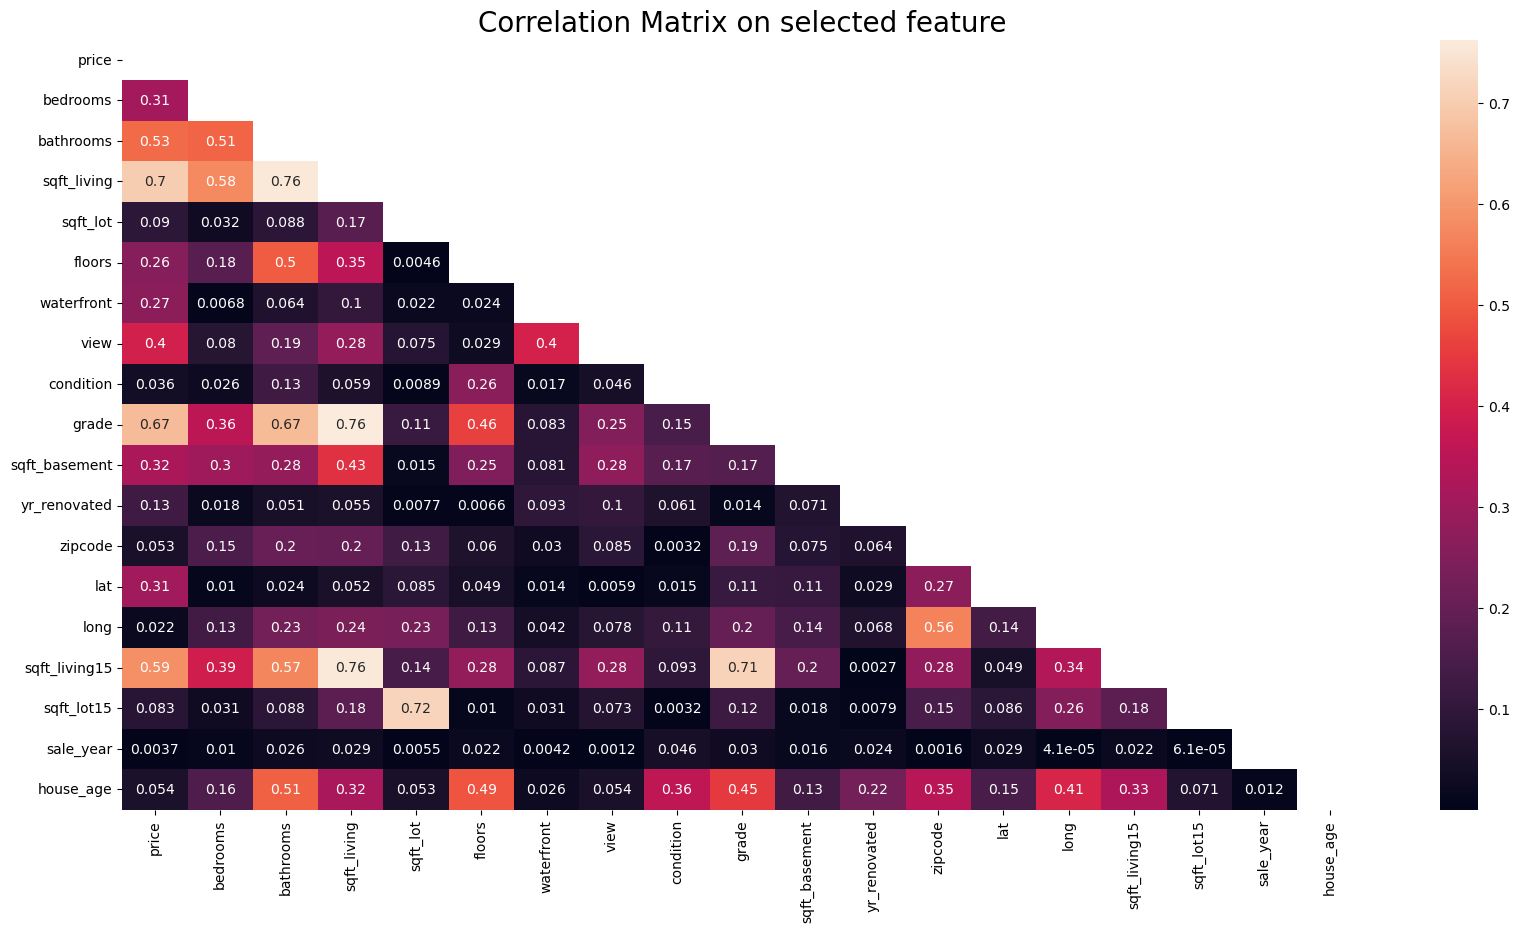

In [104]:
#heatmap
corr=np.abs(house_corr.corr())

mask=np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr, mask=mask, annot=corr )
plt.title("Correlation Matrix on selected feature", fontsize = 20);
plt.show()

In [105]:
X=house3.drop(['price'], axis=1)
y=house3['price']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = xgb.XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Feature importance

importance=model.feature_importances_
feature_importance=pd.DataFrame({'Feature' : X_train.columns, 'Importance' : importance}).sort_values(by='Importance', ascending=False)
feature_importance.head(10)


,Feature,Importance
8,grade,0.427302
5,waterfront,0.198941
2,sqft_living,0.114495
12,lat,0.071938
13,long,0.038277
6,view,0.034242
11,zipcode,0.016976
17,house_age,0.016975
14,sqft_living15,0.016201
1,bathrooms,0.013628


<Figure size 2500x2000 with 0 Axes>

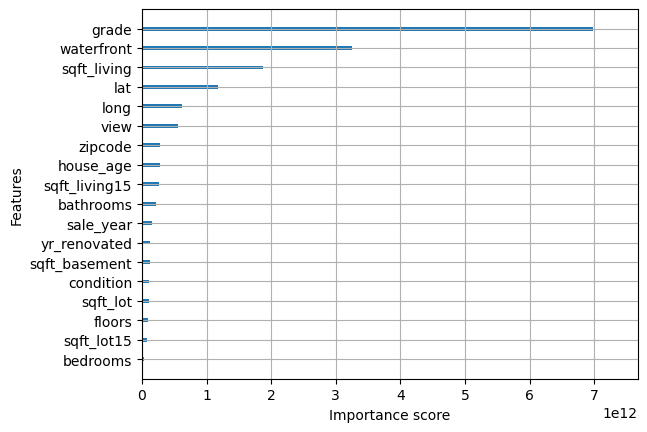

In [107]:
# Plot

plt.figure(figsize=(25, 20))
ax = xgb.plot_importance(model, importance_type='gain')

# Remove the numeric annotations beside the bars
for child in ax.get_children():
    if isinstance(child, plt.Text):
        if child.get_position()[0] > 0:  # the score texts are to the right of the bars
            child.set_visible(False)
plt.title("Feature importance", fontsize = 20)
plt.show()